In [1]:
!pip install pandas
!pip install seaborn

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv("/content/gdrive/My Drive/CO2.csv")
df.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [6]:
# 오브젝트 타입 데이터 Label Encoding 엔코딩

from sklearn.preprocessing import LabelEncoder

object_columns = df.select_dtypes(include=['object']).columns

# Label Encoding 적용
label_encoders = {}
for col in object_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Label Encoding 수행
    label_encoders[col] = le  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   int32  
 1   Model                             7385 non-null   int32  
 2   Vehicle Class                     7385 non-null   int32  
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   int32  
 6   Fuel Type                         7385 non-null   int32  
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

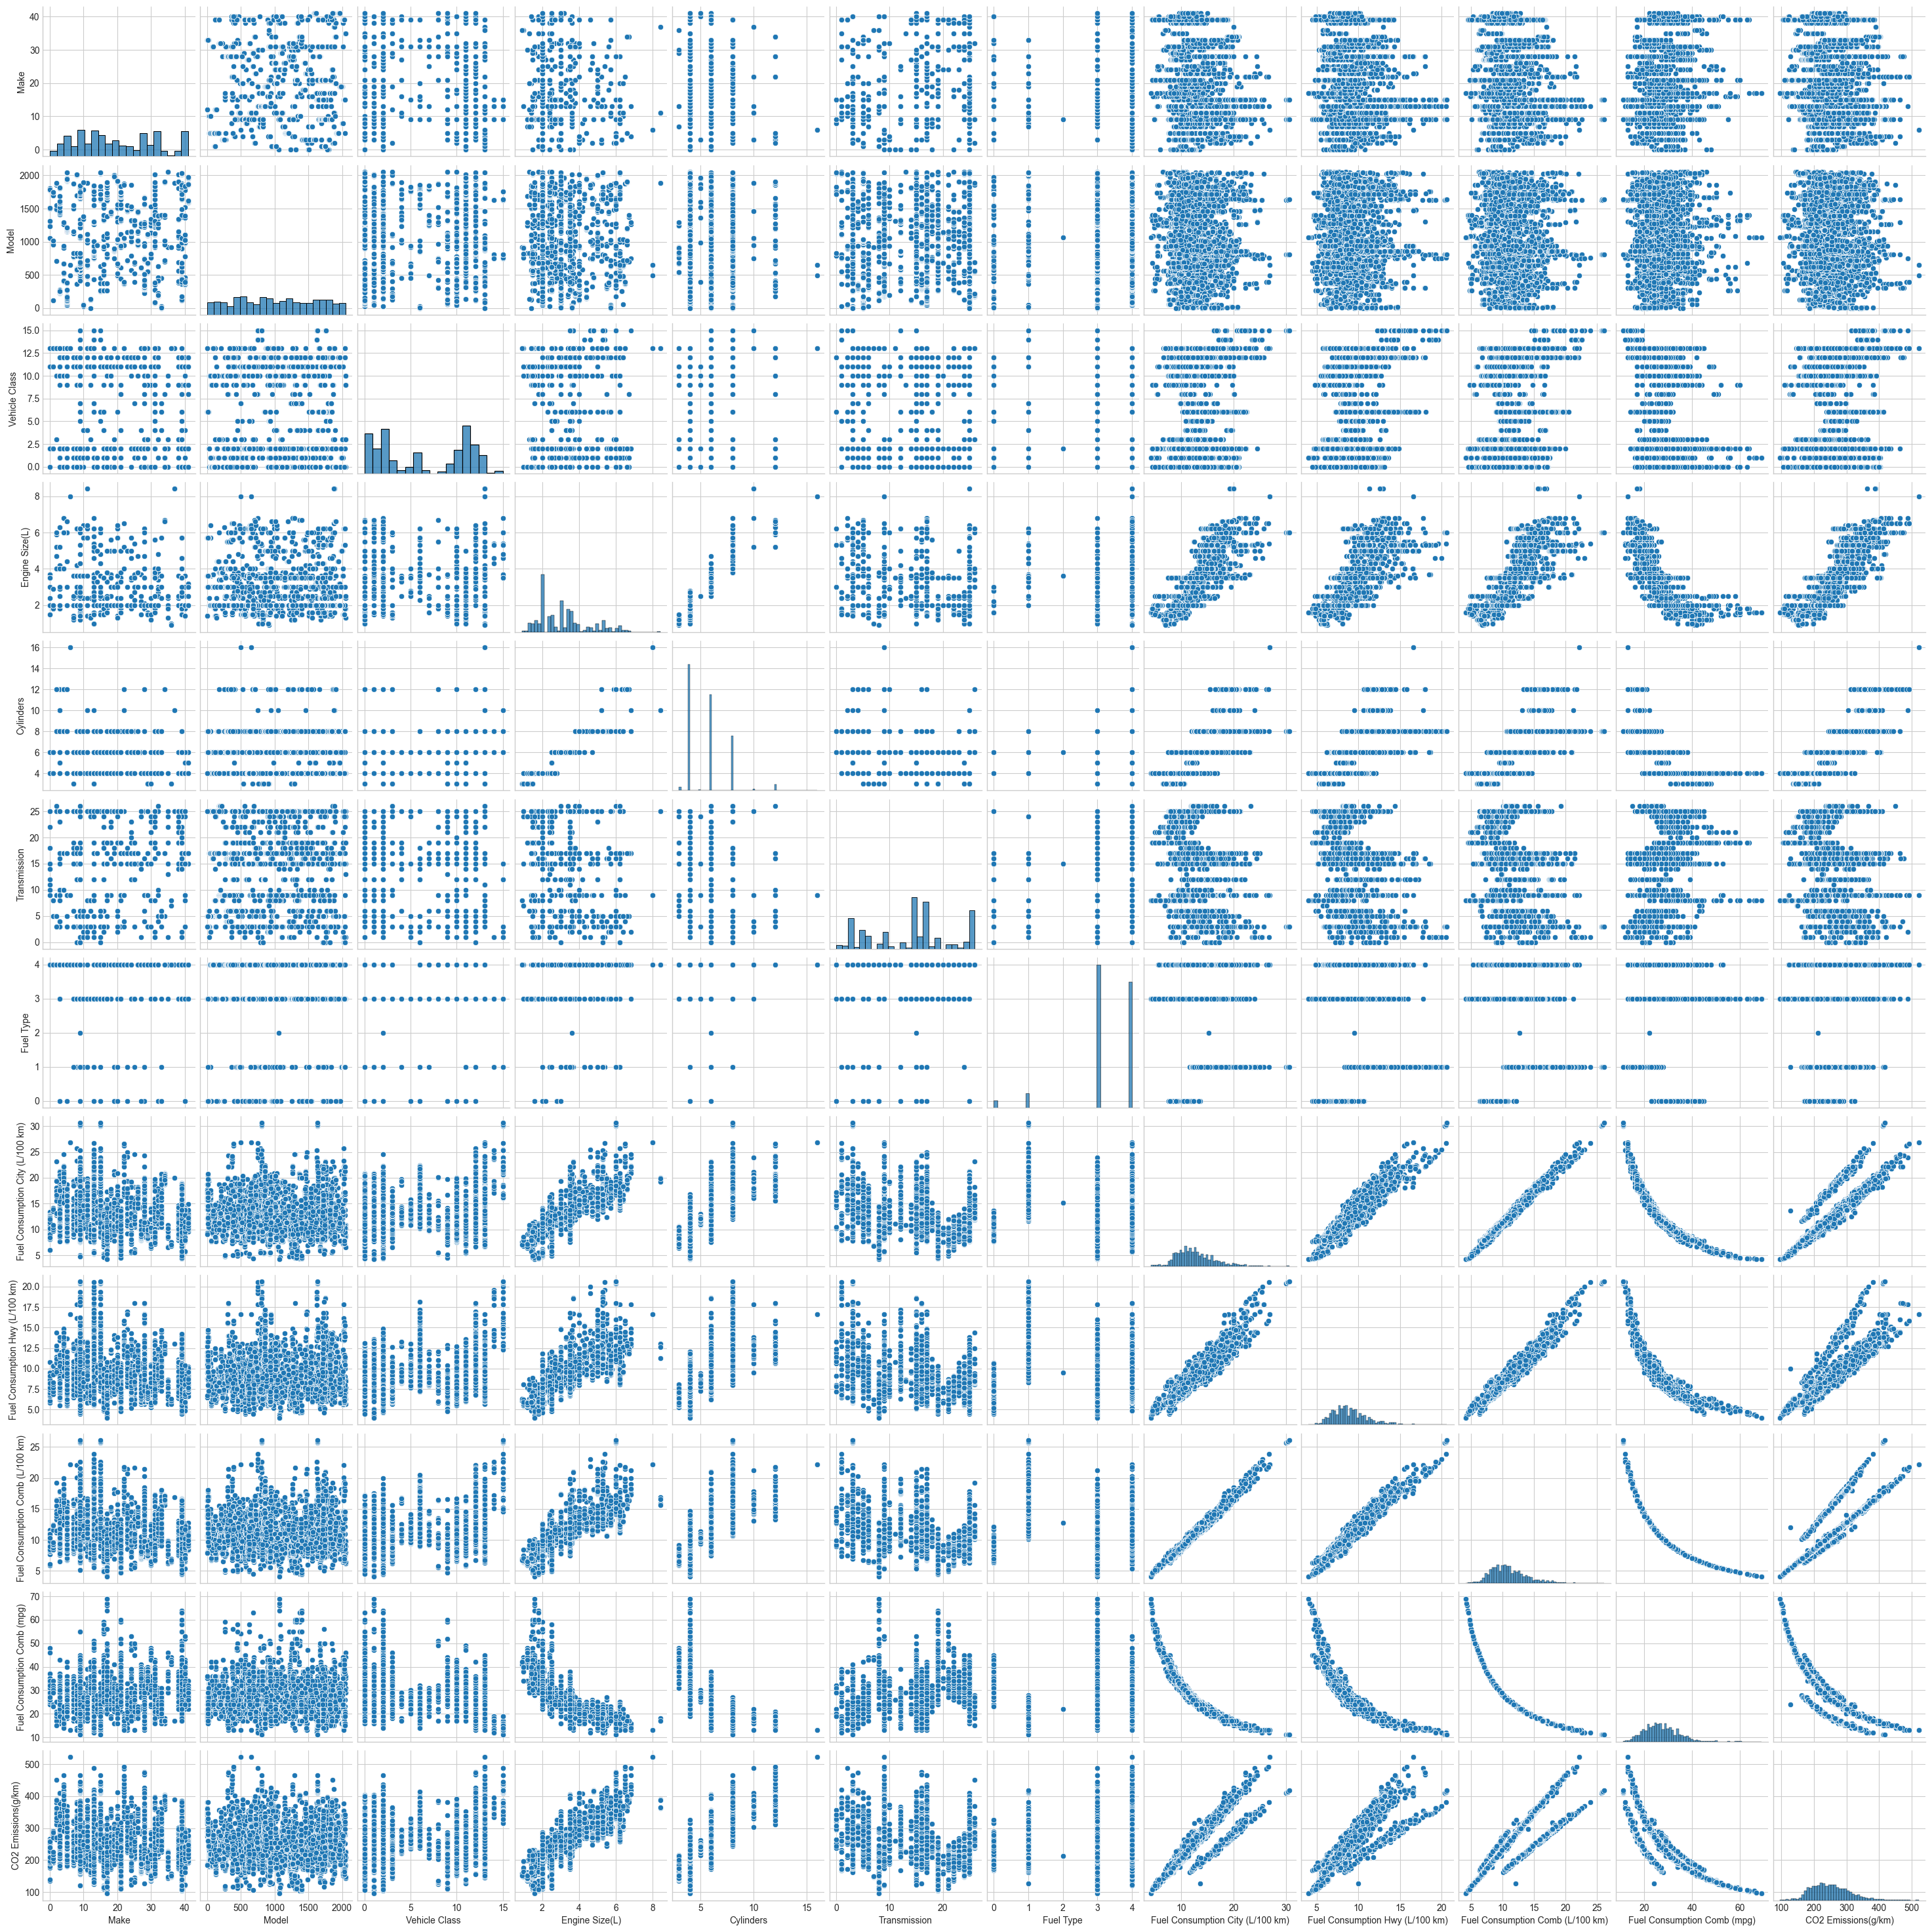

In [8]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)

sb.pairplot(df)
plt.savefig('pairplor.png')

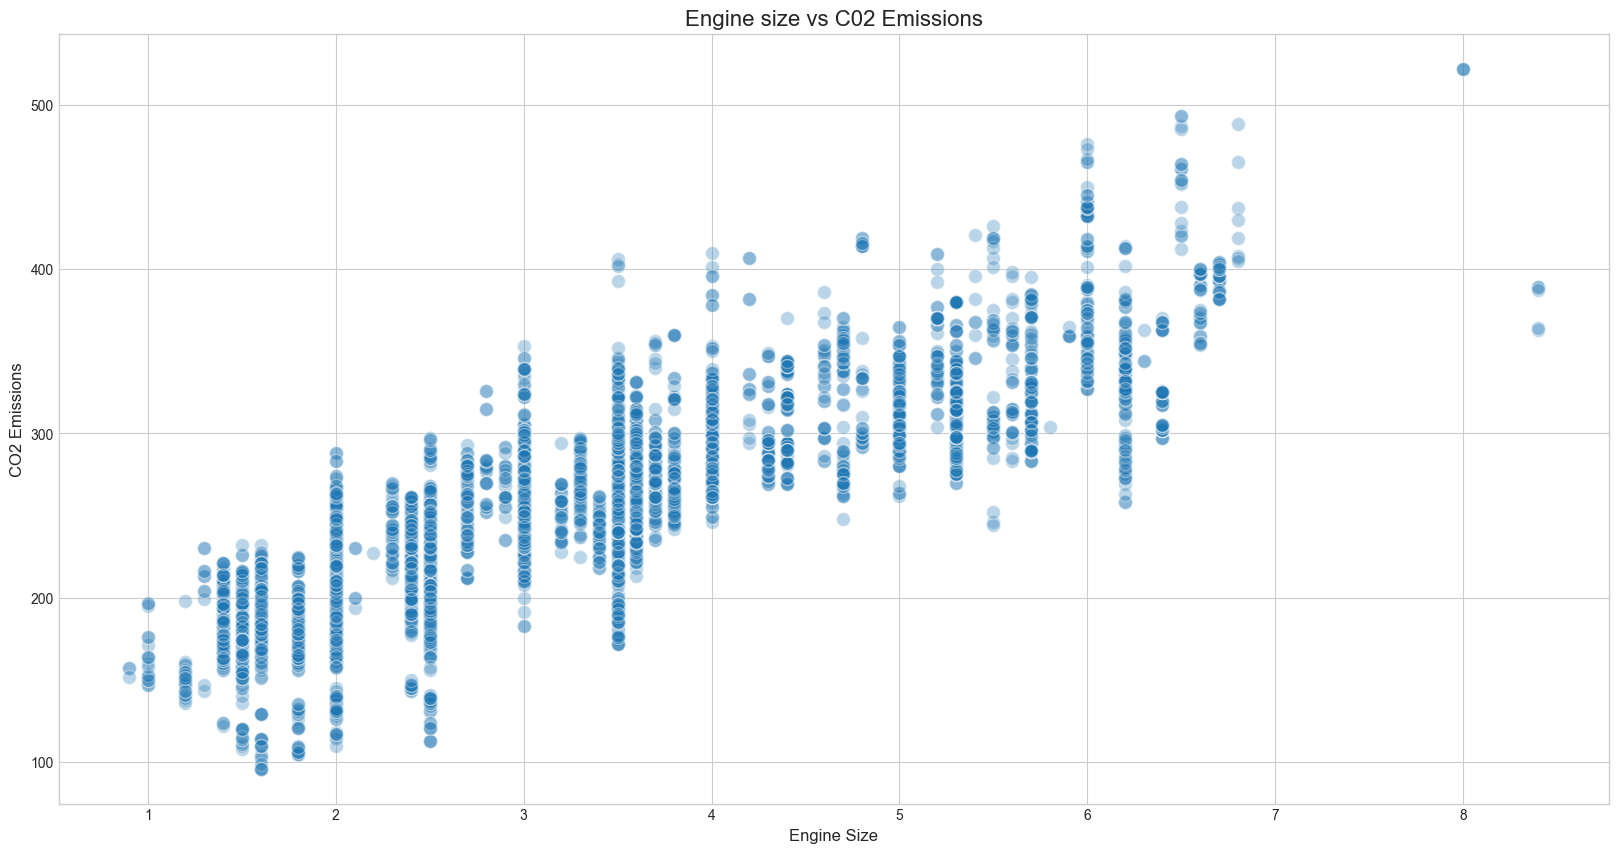

In [9]:
plt.scatter(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)', data = df, s = 100, alpha = 0.3, edgecolor = 'white')

plt.title('Engine size vs C02 Emissions', fontsize = 16)
plt.ylabel('CO2 Emissions', fontsize = 12)
plt.xlabel('Engine Size', fontsize = 12)

plt.savefig('enginesize_co2.png')

In [10]:
from sklearn.model_selection import train_test_split
X_var = df[['Engine Size(L)']] # independent variable
y_var = df['CO2 Emissions(g/km)'] # dependent variable
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 0)

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

In [12]:
from termcolor import colored as cl
print(cl('R-Squared :', attrs = ['bold']), 
lr.score(X_test, y_test))
 #R-Squared : 0.7162770226132333

R-Squared : 0.7162770226132333


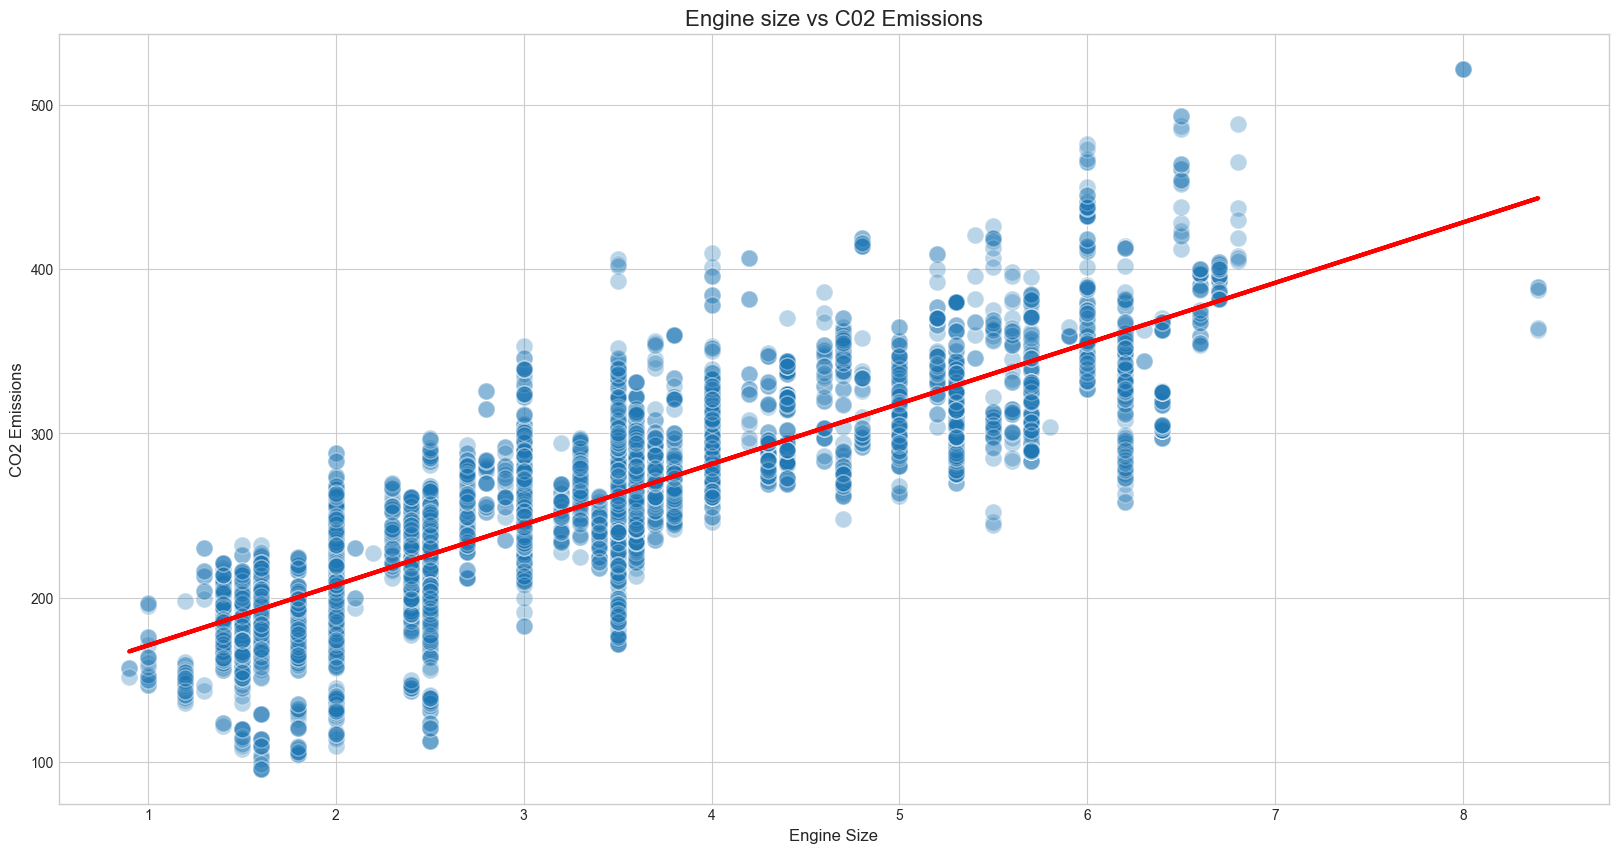

In [13]:
slr_slope= lr.coef_
slr_intercept= lr.intercept_

sb.scatterplot(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)', data = df, s = 150, alpha = 0.3, edgecolor= 'white')
plt.plot(df['Engine Size(L)'], slr_slope*df['Engine Size(L)'] + slr_intercept, color = 'r', linewidth = 3)
plt.title('Engine size vs C02 Emissions', fontsize= 16)
plt.ylabel('CO2 Emissions', fontsize= 12)
plt.xlabel('Engine Size', fontsize= 12)

plt.savefig('enginesize_co2_fit.png')

## Encodeing 데이터 포함 Multiple Linear Regression (MLR) 실행

In [14]:
from sklearn.model_selection import train_test_split
X1_var = df.drop(columns=['CO2 Emissions(g/km)'])
y_var= df['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test=train_test_split(X1_var, y_var, test_size= 0.3, random_state= 0)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

In [16]:
from termcolor import colored as cl
print(cl('R-Squared :', attrs = ['bold']), 
lr.score(X_test, y_test))
 #R-Squared : 0.8655946234480003

R-Squared : 0.9078971490634951


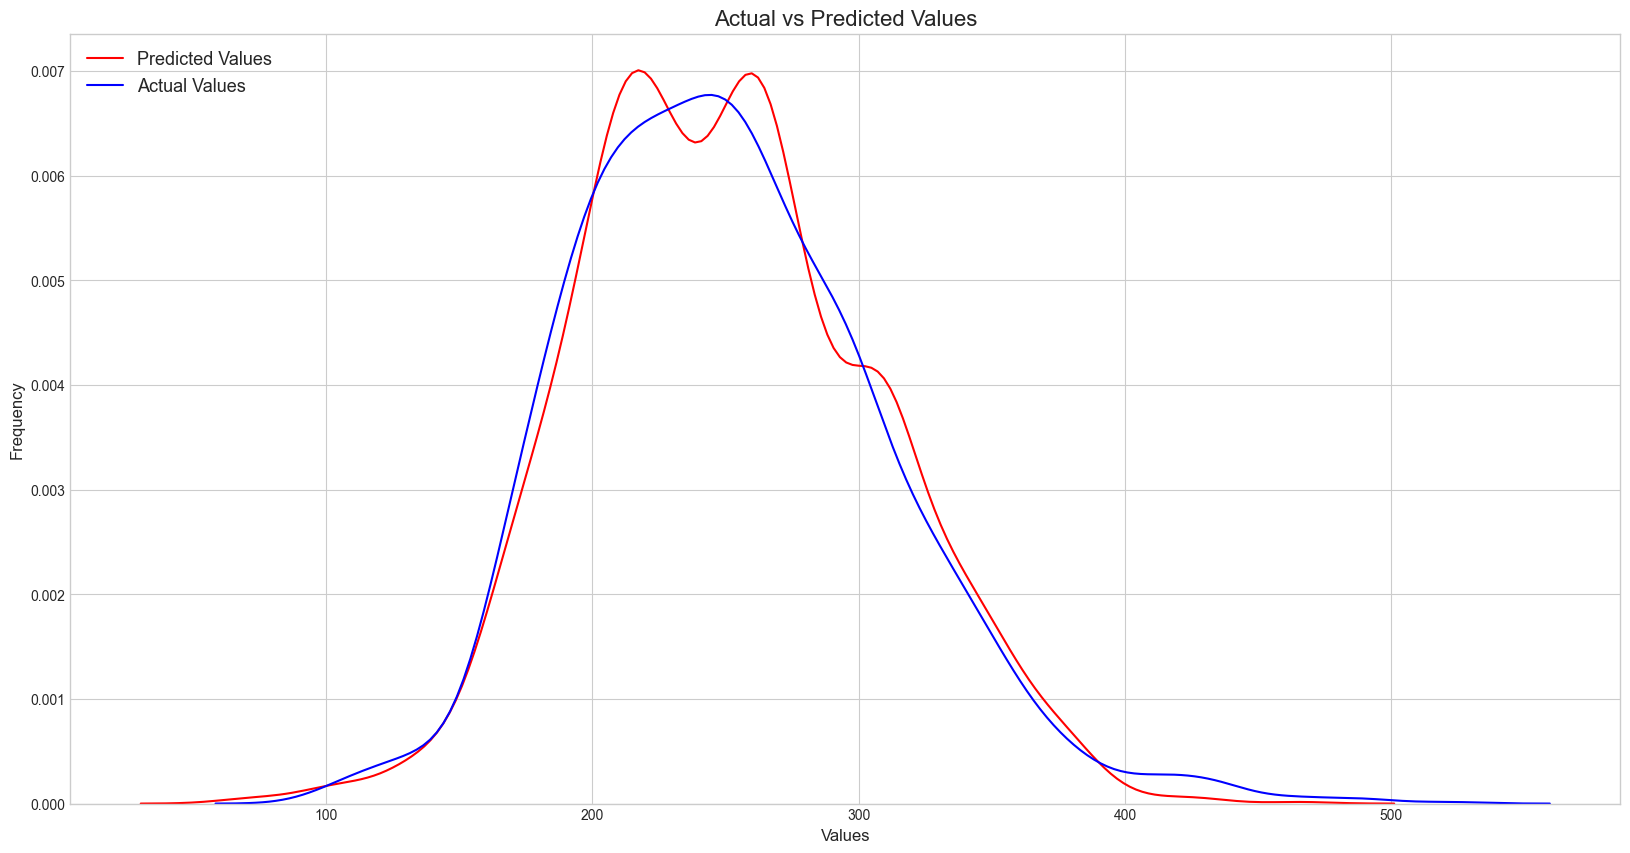

In [19]:
sb.kdeplot(yhat, color='r', label='Predicted Values')
sb.kdeplot(y_test, color='b', label='Actual Values')

plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(loc='upper left', fontsize=13)

plt.savefig('ap.png')

#sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
#sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
#plt.title('Actual vs Predicted Values', fontsize = 16)
#plt.xlabel('Values', fontsize = 12)
#plt.ylabel('Frequency', fontsize = 12)
#plt.legend(loc = 'upper left', fontsize = 13)

#plt.savefig('ap.png')